<a href="https://colab.research.google.com/github/BossBosssmile/BADS7105_CRM_Analytics/blob/main/Product_Recommendation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [ ]:
!pip install mlxtend

# Import Data

In [ ]:
import pandas as pd

df = pd.read_csv('Prod_Rec.csv')

In [ ]:
df.head(30)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05,NaN,NaN,NaN,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,10/28/2021 14:06,NaN,NaN,NaN,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0
5,10/28/2021 14:06,NaN,NaN,NaN,1,0,0,0,1,0,0,1,0,0,0,1,0.0,0,0,0,1,1,0,1,0,1,0,1
6,10/28/2021 14:06,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,1,0,0
7,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,0,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,1
8,10/28/2021 14:06,NaN,NaN,0.0,1,1,1,1,0,0,0,1,0,0,0,1,0.0,1,0,0,1,0,0,1,0,0,0,0
9,10/28/2021 14:06,0.0,NaN,1.0,1,0,1,1,1,1,0,1,0,0,0,1,1.0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
missing = df.isnull().sum()
print(missing)

Timestamp                                  0
โปรแกรมแท้                                14
เครื่องซักผ้า                             17
NONE                                      12
รองเท้าวิ่ง                                0
ผักกรอบ                                    0
คอร์สเรียนเสริม                            0
nintendo switch                            0
BTC (Bitcoin)                              0
mechanical keyboard                        0
เครื่องดูดฝุ่น Dyson                       0
เคส ipad                                   0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่             0
สินค้าจากพิมรี่พาย                         0
I PHONE 13                                 0
หูฟัง bluetooth (airpods,truewireless)     0
แก้วน้ำ Starbucks                          1
เบาะรองนั่ง                                0
เครื่องชงกาแฟแคปซูล                        0
ตั๋วเครื่องบินไปญี่ปุ่น                    0
Ebook                                      0
ตู้เย็น                                    0
กล้องฟิล์ม

In [ ]:
hot_encoded_df=df.fillna(0).drop('Timestamp',1).drop(columns='NONE').drop(columns='I PHONE 13').applymap(int)

In [ ]:
hot_encoded_df.head(30)

,โปรแกรมแท้,เครื่องซักผ้า,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,0,0,1,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0
4,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1
6,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7,0,0,1,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1
8,0,0,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
9,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0


# Product Recommendation

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.6, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.965517,(รองเท้าวิ่ง)
1,0.931034,(คอร์สเรียนเสริม)
2,0.896552,(เคส ipad)
3,0.758621,"(หูฟัง bluetooth (airpods,truewireless))"
4,0.655172,(Ebook)
5,0.896552,"(คอร์สเรียนเสริม, รองเท้าวิ่ง)"
6,0.862069,"(เคส ipad, รองเท้าวิ่ง)"
7,0.758621,"(หูฟัง bluetooth (airpods,truewireless), รองเท..."
8,0.655172,"(Ebook, รองเท้าวิ่ง)"
9,0.827586,"(เคส ipad, คอร์สเรียนเสริม)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.015)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
3,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
4,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
5,(คอร์สเรียนเสริม),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
6,(เคส ipad),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
7,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
8,"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",(รองเท้าวิ่ง),0.689655,0.965517,0.689655,1.000000,1.035714,0.023781,inf
9,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",0.965517,0.689655,0.689655,0.714286,1.035714,0.023781,1.086207


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437
2,(Ebook),(รองเท้าวิ่ง),0.655172,0.965517,0.655172,1.000000,1.035714,0.022592,inf
3,(รองเท้าวิ่ง),(Ebook),0.965517,0.655172,0.655172,0.678571,1.035714,0.022592,1.072797
4,(Ebook),(คอร์สเรียนเสริม),0.655172,0.931034,0.620690,0.947368,1.017544,0.010702,1.310345
5,(คอร์สเรียนเสริม),(Ebook),0.931034,0.655172,0.620690,0.666667,1.017544,0.010702,1.034483
6,(เคส ipad),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
7,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
8,"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",(รองเท้าวิ่ง),0.689655,0.965517,0.689655,1.000000,1.035714,0.023781,inf
9,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless), คอร์ส...",0.965517,0.689655,0.689655,0.714286,1.035714,0.023781,1.086207


In [ ]:
rules_Top10 = rules.sort_values(["lift"], ascending = (False))
rules_Top10.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,"(เคส ipad, รองเท้าวิ่ง)",(Ebook),0.862069,0.655172,0.620690,0.720000,1.098947,0.055886,1.231527
24,(Ebook),"(เคส ipad, รองเท้าวิ่ง)",0.655172,0.862069,0.620690,0.947368,1.098947,0.055886,2.620690
23,(เคส ipad),"(Ebook, รองเท้าวิ่ง)",0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
13,(Ebook),"(คอร์สเรียนเสริม, รองเท้าวิ่ง)",0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
12,"(คอร์สเรียนเสริม, รองเท้าวิ่ง)",(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
22,"(Ebook, รองเท้าวิ่ง)",(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
6,(เคส ipad),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
7,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
17,"(เคส ipad, รองเท้าวิ่ง)","(หูฟัง bluetooth (airpods,truewireless))",0.862069,0.758621,0.689655,0.800000,1.054545,0.035672,1.206897
18,"(หูฟัง bluetooth (airpods,truewireless))","(เคส ipad, รองเท้าวิ่ง)",0.758621,0.862069,0.689655,0.909091,1.054545,0.035672,1.517241


In [ ]:
rules_Top10[rules_Top10['antecedents'].str.len()==1].head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(Ebook),"(เคส ipad, รองเท้าวิ่ง)",0.655172,0.862069,0.620690,0.947368,1.098947,0.055886,2.620690
23,(เคส ipad),"(Ebook, รองเท้าวิ่ง)",0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
13,(Ebook),"(คอร์สเรียนเสริม, รองเท้าวิ่ง)",0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
6,(เคส ipad),(Ebook),0.896552,0.655172,0.620690,0.692308,1.056680,0.033294,1.120690
7,(Ebook),(เคส ipad),0.655172,0.896552,0.620690,0.947368,1.056680,0.033294,1.965517
18,"(หูฟัง bluetooth (airpods,truewireless))","(เคส ipad, รองเท้าวิ่ง)",0.758621,0.862069,0.689655,0.909091,1.054545,0.035672,1.517241
25,(รองเท้าวิ่ง),"(เคส ipad, Ebook)",0.965517,0.620690,0.620690,0.642857,1.035714,0.021403,1.062069
19,(รองเท้าวิ่ง),"(เคส ipad, หูฟัง bluetooth (airpods,truewirele...",0.965517,0.689655,0.689655,0.714286,1.035714,0.023781,1.086207
0,"(หูฟัง bluetooth (airpods,truewireless))",(รองเท้าวิ่ง),0.758621,0.965517,0.758621,1.000000,1.035714,0.026159,inf
1,(รองเท้าวิ่ง),"(หูฟัง bluetooth (airpods,truewireless))",0.965517,0.758621,0.758621,0.785714,1.035714,0.026159,1.126437


## Visualization

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3627 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3641 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s

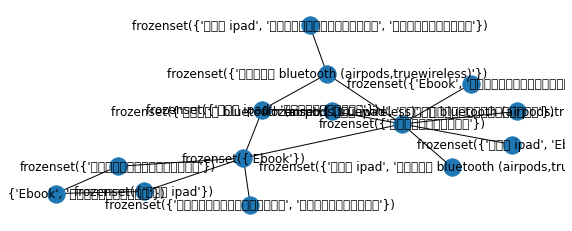

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3650 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s

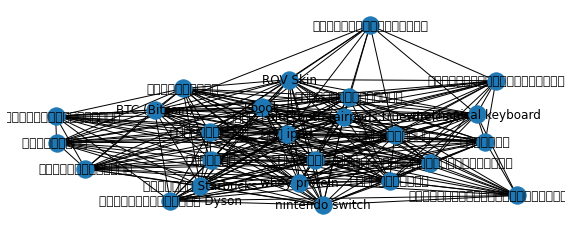

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

# **สรุปผล**
  
จาก 10 อันดับ ที่คนเคยซื้อจะเห็นว่า สินค้าที่ซื้อหลักๆคือEBook และอุปกรณ์เสริมที่เกี่ยวกับการศึกษา เคสipad คอร์สเรียนเสริมและ จากกลุ่มที่ซื้อEbookนี้ก็มีกลุ่มที่รักการออกกำลังกาย คือมีโอกาสที่จะซื้อ รองเท้าวิ่ง พร้อมกับ หูฟัง เพื่อเพิ่มความเพลิดเพลินในการออกกำลังกาย